In [28]:
import csv

UP = "UP"
DOWN = "DOWN"


def calculate_tendency(old_value, new_value):
    if old_value <= new_value:
        return UP
    return DOWN

def process_stocks_file(file = '../accion A.csv'):
    states = {
        'UP': {
            'UP': 0,
            'DOWN': 0,
        },
        'DOWN':{
            'DOWN': 0,
            'UP': 0
        }
    }
    csv_file = open(file)
        
    csv_reader = csv.reader(csv_file, delimiter=',')
    lines = list(map(lambda x: [x[0], float(x[1])], list(csv_reader)))
    csv_file.close()

    up_count = 0
    down_count = 0
    
    old_value = lines[0][1]
    new_value = lines[1][1]
    old_state = calculate_tendency(old_value, new_value)
    for i in range(1, len(lines)):
        old_value = lines[i - 1][1]
        new_value = lines[i][1]
        new_state = calculate_tendency(old_value, new_value)
        if new_state == UP:
            up_count += 1
        else:
            down_count += 1
        states[old_state][new_state] += 1
        old_state = new_state
    
    count = len(lines) - 1
    
    probabilities = {
        'UP': {
            'UP': states['UP']['UP']/up_count,
            'DOWN': states['UP']['DOWN']/up_count,
            'total': states['UP']['UP']/count + states['UP']['DOWN']/count 
        },
        'DOWN':{
            'DOWN': states['DOWN']['DOWN']/down_count,
            'UP': states['DOWN']['UP']/down_count,
            'total': states['DOWN']['UP']/count + states['DOWN']['DOWN']/count
        }
    }
    
    return probabilities

In [29]:

action_a_probabilities = process_stocks_file('../accion A.csv')
print(action_a_probabilities)

{'UP': {'UP': 0.4434389140271493, 'DOWN': 0.5565610859728507, 'total': 0.5145518044237486}, 'DOWN': {'DOWN': 0.41007194244604317, 'UP': 0.5899280575539568, 'total': 0.48544819557625146}}


In [30]:
action_b_probabilities = process_stocks_file('../accion B.csv')
print(action_b_probabilities)

{'UP': {'UP': 0.324582338902148, 'DOWN': 0.6778042959427207, 'total': 0.48894062863795107}, 'DOWN': {'DOWN': 0.35454545454545455, 'UP': 0.6431818181818182, 'total': 0.5110593713620488}}


In [17]:
import random

CHANGE_SENSITIVITY = 1.1
def change_value(value, direction):
    if direction == UP:
        return value * CHANGE_SENSITIVITY
    return value / CHANGE_SENSITIVITY

def simulate_year(initial_state, probabilities):
    new_values = []
    previous_value = initial_state
    previous_tendency = None

    up_choices = [UP] * int(probabilities['UP']['UP'] * 10000) + [DOWN] * int(probabilities['UP']['DOWN'] * 10000)
    down_choices = [UP] * int(probabilities['DOWN']['UP'] * 10000) + [DOWN] * int(probabilities['DOWN']['DOWN'] * 10000)

    value = initial_state
    for i in range(365):
        next_direction = None

        if previous_tendency is None:
            choices = [UP] * int(probabilities['UP']['total'] * 10000) + [DOWN] * int(probabilities['DOWN']['total'] * 10000)
            next_direction = random.choice(choices)
        elif previous_tendency == UP:
            next_direction = random.choice(up_choices)
        elif previous_tendency == DOWN:
            next_direction = random.choice(down_choices)

        new_value = change_value(value, next_direction)
        previous_tendency = calculate_tendency(value, new_value)
        value = new_value
        new_values.append(new_value)


            
    return new_values
            
        
        

In [26]:
import statistics

results = [] 
for i in range(10000):
    a_year_results = simulate_year(51.20, action_a_probabilities)
    results.append(a_year_results[-1])

print('a_results', statistics.median(results))

a_results 146.07957535283208


In [27]:
import statistics

results = [] 
for i in range(10000):
    b_year_results = simulate_year(51.20, action_b_probabilities)
    results.append(b_year_results[-1])    
print('b_results', statistics.median(results))

b_results 21.713798060671216


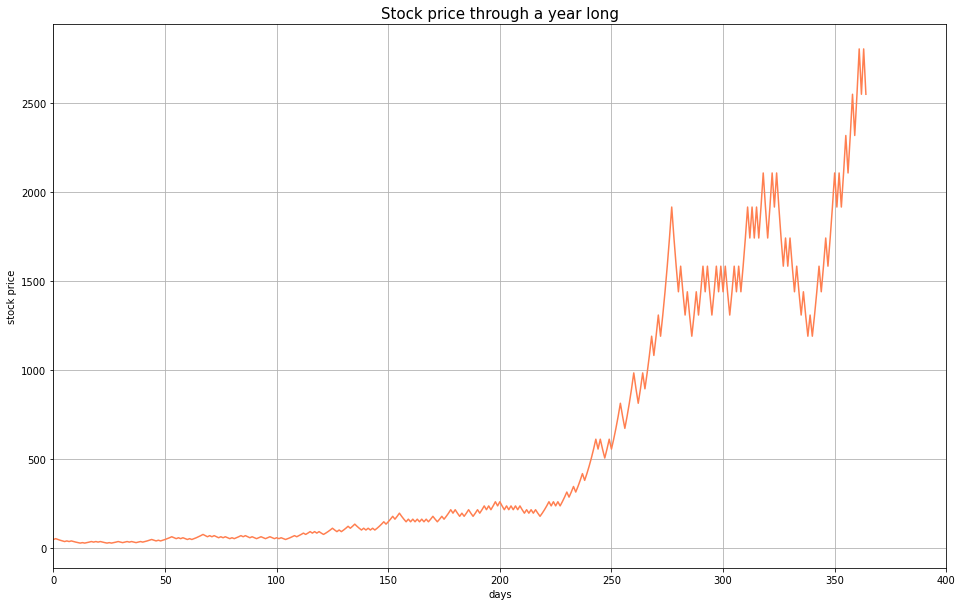

In [24]:
import matplotlib.pyplot as plt

a_year_results = simulate_year(51.20, action_a_probabilities)

plt.figure(figsize=(16,10))
plt.plot([i for i in range(365)], a_year_results, color='coral')
plt.xlabel('days')
plt.ylabel('stock price')
plt.title('Stock price through a year long', fontsize=15)
plt.xlim(0, 400)
plt.grid()
plt.show()

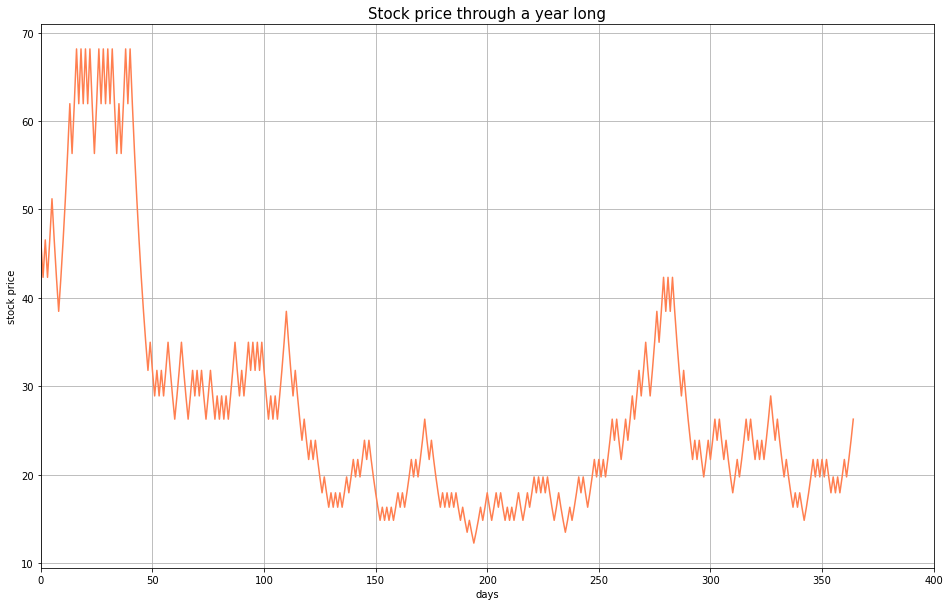

In [25]:
import matplotlib.pyplot as plt

b_year_results = simulate_year(51.20, action_b_probabilities)

plt.figure(figsize=(16,10))
plt.plot([i for i in range(365)], b_year_results, color='coral')
plt.xlabel('days')
plt.ylabel('stock price')
plt.title('Stock price through a year long', fontsize=15)
plt.xlim(0, 400)
plt.grid()
plt.show()
